In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_path = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/20150323-20190817-google-metrics-export - 20150323-20190817-google-metrics-export.csv"
data = pd.read_csv(data_path)

Exracting Google Meet related metrics

In [2]:
Meet = data[data['metric_name'].str.startswith('google.meet')]
Meet.head()

,time,metric_name,metric_value
318219,2018-01-14T00:00:00.000-0500,google.meet:average_meeting_minutes,0
318220,2018-01-14T00:00:00.000-0500,google.meet:average_meeting_minutes_with_11_to...,0
318221,2018-01-14T00:00:00.000-0500,google.meet:average_meeting_minutes_with_16_to...,0
318222,2018-01-14T00:00:00.000-0500,google.meet:average_meeting_minutes_with_26_to...,0
318223,2018-01-14T00:00:00.000-0500,google.meet:average_meeting_minutes_with_2_calls,0


In [34]:
Meet.to_csv('GoogleMeet.csv')

Shape Of Data

In [3]:
Meet.shape

(29434, 3)

Number of Metric names related to Google Meet

In [4]:
meet_group_names = Meet.metric_name.unique()
len(meet_group_names)

55

In [5]:
meet_group_names

array(['google.meet:average_meeting_minutes',
       'google.meet:average_meeting_minutes_with_11_to_15_calls',
       'google.meet:average_meeting_minutes_with_16_to_25_calls',
       'google.meet:average_meeting_minutes_with_26_to_50_calls',
       'google.meet:average_meeting_minutes_with_2_calls',
       'google.meet:average_meeting_minutes_with_3_to_5_calls',
       'google.meet:average_meeting_minutes_with_6_to_10_calls',
       'google.meet:lonely_meetings',
       'google.meet:max_concurrent_usage_chromebase',
       'google.meet:max_concurrent_usage_chromebox',
       'google.meet:num_1day_active_users',
       'google.meet:num_30day_active_users',
       'google.meet:num_7day_active_users', 'google.meet:num_calls',
       'google.meet:num_calls_android',
       'google.meet:num_calls_by_external_users',
       'google.meet:num_calls_by_internal_users',
       'google.meet:num_calls_by_pstn_in_users',
       'google.meet:num_calls_chromebase',
       'google.meet:num_calls_chr

Metric Names and the number of metric values associated with the corresponding metric name. Number of times a metric name appeared in the data set

In [6]:
counts = Meet['metric_name'].value_counts()
counts.tail(10)

google.meet:num_meetings_with_3_to_5_calls          541
google.meet:total_call_minutes_chromebox            541
google.meet:total_call_minutes                      541
google.meet:num_meetings_chromebox                  541
google.meet:num_7day_active_users                   538
google.meet:num_30day_active_users                  538
google.meet:num_1day_active_users                   535
google.meet:num_calls_by_pstn_out_users             438
google.meet:num_meetings_with_pstn_out_users        438
google.meet:total_call_minutes_by_pstn_out_users    438
Name: metric_name, dtype: int64

Value counts is used to find the number of observations with metric value as 0,1,..
There are 18775 observations with metric value as 0

In [7]:
x = Meet.metric_value.value_counts()
x.head()

0    18775
1     1219
2      793
3      548
4      370
Name: metric_value, dtype: int64

Finding number of negative metric_values using mask. There are no negative values

In [8]:
mask = (Meet.metric_value < 0)
Meet[mask].head()

,time,metric_name,metric_value


Sorting using metric values in ascending order.

In [9]:
Meet.metric_value.sort_values().head(10)

318219    0
482202    0
482200    0
482197    0
482194    0
482193    0
482192    0
482190    0
482189    0
482188    0
Name: metric_value, dtype: int64

describe is used to detect non-numeric data to get some useful information like number of unique metric names and highest metric name

In [10]:
Meet.metric_name.describe()

count                             29434
unique                               55
top       google.meet:num_calls_android
freq                                541
Name: metric_name, dtype: object

Maximum value in dataframe

In [11]:
Meet.loc[Meet['metric_value'].idxmax()]

time              2019-07-01T00:00:00.000-0400
metric_name     google.meet:total_call_minutes
metric_value                              7623
Name: 589423, dtype: object

Minimun value in dataframe

In [12]:
Meet.loc[Meet['metric_value'].idxmin()]

time                   2018-01-14T00:00:00.000-0500
metric_name     google.meet:average_meeting_minutes
metric_value                                      0
Name: 318219, dtype: object

In [13]:
Meet.time.dtype

dtype('O')

In [14]:
from datetime import datetime
datetime.strptime("2015-03-23T00:00:00.000-0400", "%Y-%m-%dT%H:%M:%S.%f%z")

datetime.datetime(2015, 3, 23, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000)))

converting all the dates of time column by using the apply method.

In [15]:
Meet.time = Meet.time.apply(lambda d: datetime.strptime(d, "%Y-%m-%dT%H:%M:%S.%f%z"))   

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
time = Meet.time
time.head()

318219    2018-01-14 00:00:00-05:00
318220    2018-01-14 00:00:00-05:00
318221    2018-01-14 00:00:00-05:00
318222    2018-01-14 00:00:00-05:00
318223    2018-01-14 00:00:00-05:00
Name: time, dtype: object

In [17]:
Meet.time = Meet['time'].apply(lambda x: pd.to_datetime(x).tz_convert('US/Eastern'))

Extracting date from time stamp

In [18]:
Meet['date'] = pd.DatetimeIndex(Meet['time']).date

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
Meet.head()

,time,metric_name,metric_value,date
318219,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes,0,2018-01-14
318220,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes_with_11_to...,0,2018-01-14
318221,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes_with_16_to...,0,2018-01-14
318222,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes_with_26_to...,0,2018-01-14
318223,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes_with_2_calls,0,2018-01-14


Extracting date from time stamp

In [20]:
Meet['year'] = pd.DatetimeIndex(Meet['time']).year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
Meet.head()

,time,metric_name,metric_value,date,year
318219,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes,0,2018-01-14,2018
318220,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes_with_11_to...,0,2018-01-14,2018
318221,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes_with_16_to...,0,2018-01-14,2018
318222,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes_with_26_to...,0,2018-01-14,2018
318223,2018-01-14 00:00:00-05:00,google.meet:average_meeting_minutes_with_2_calls,0,2018-01-14,2018


In [24]:
Meet.groupby(['metric_name', 'year']).count().head(10)

time  metric_value  \
metric_name                                        year                       
google.meet:average_meeting_minutes                2018   328           328   
                                                   2019   213           213   
google.meet:average_meeting_minutes_with_11_to_... 2018   328           328   
                                                   2019   213           213   
google.meet:average_meeting_minutes_with_16_to_... 2018   328           328   
                                                   2019   213           213   
google.meet:average_meeting_minutes_with_26_to_... 2018   328           328   
                                                   2019   213           213   
google.meet:average_meeting_minutes_with_2_calls   2018   328           328   
                                                   2019   213           213   

                                                         date  
metric_name                                        year        
google.meet:average_meeting_minutes                2018   328  
                                                   2019   213  
google.meet:average_meeting_minutes_with_11_to_... 2018   328  
                                                   2019   213  
google.meet:average_meeting_minutes_with_16_to_... 2018   328  
                                                   2019   213  
google.meet:average_meeting_minutes_with_26_to_... 2018   328  
                                                   2019   213  
google.meet:average_meeting_minutes_with_2_calls   2018   328  
                                                   2019   213

Number of observations for each year

In [25]:
Meet.year.value_counts()

2018    17731
2019    11703
Name: year, dtype: int64

Number of Metric Names based on year. We have same metric names in both years and there are no new metrics added in 2019.

In [26]:
Meet.query('year == "2018"')['metric_name'].agg(['nunique','size'])

nunique       55
size       17731
Name: metric_name, dtype: int64

In [27]:
Meet.query('year == "2019"')['metric_name'].agg(['nunique','size'])

nunique       55
size       11703
Name: metric_name, dtype: int64

Number of Observations count over the years

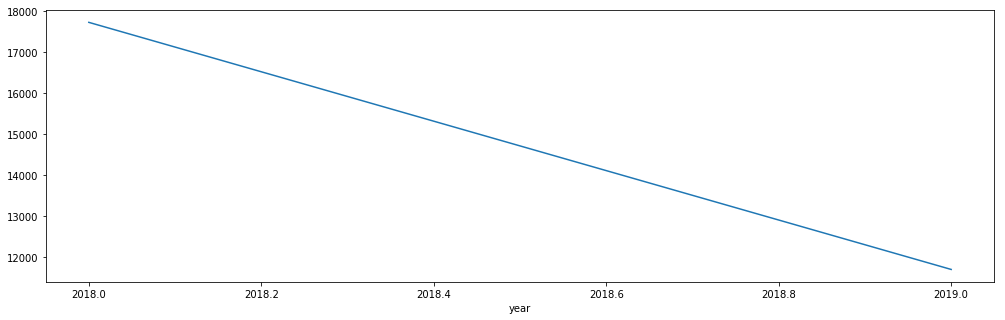

In [28]:
import matplotlib as plt
fig, ax = plt.pyplot.subplots(figsize=(17,5))
Meet.groupby(['year']).count()['metric_name'].plot(ax=ax)

Finding the metric value by passing quantile value. In the lowest quantile values are negative. 

In [29]:
Meet['metric_value'].quantile(0)

0.0

Median of metric values

In [30]:
Meet['metric_value'].quantile(0.5)

0.0

Highest Metric values are around 7623

In [31]:
Meet['metric_value'].quantile(1.0)

7623.0

Mean value is far away from median as our data is not homogeneous. Metric values in google meet can represent any of the following like

1. Number of minutes spent in a meeting
2. Number of active users in google meet
3. Number of meetings

In [33]:
Meet.metric_value.mean()

78.57729156757492